<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

----

This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [**here**](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

In [7]:
# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head()

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96
3,24/01/2005,163
4,31/01/2005,122


**Check the dataframe dtypes**

In [11]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [13]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the Date column to a datetime type**

Use **pd.to_datetime** to convert the Date column to a datetime.

**WARNING**: The date column is formatted as day-month-year. Does **pd.to_datetime** work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check the [**documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for **pd.to_datetime**, and see if one of the settings fixes things.

In [17]:
# Convert 'Date' column from string to datetime type
pox['date'] = pd.to_datetime(pox['date'],format=("%d/%m/%Y"))

# Display first few rows to verify the conversion
pox.head()

,date,budapest_cases
0,2005-01-03,168
1,2005-01-10,157
2,2005-01-17,96
3,2005-01-24,163
4,2005-01-31,122


**Set the **Date** column to be the index**

In [19]:
# Set Date column as the DataFrame index
pox.set_index('date', inplace=True)

# Display first few rows to verify the reindexing
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [21]:
pox.sort_index(inplace=True)

In [27]:
# The ealiest date
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


In [29]:
# The latest date
pox.tail()

,budapest_cases
date,
2014-12-01,95
2014-12-08,43
2014-12-15,35
2014-12-22,30
2014-12-29,259


**Plot a histogram of the Budapest cases column**

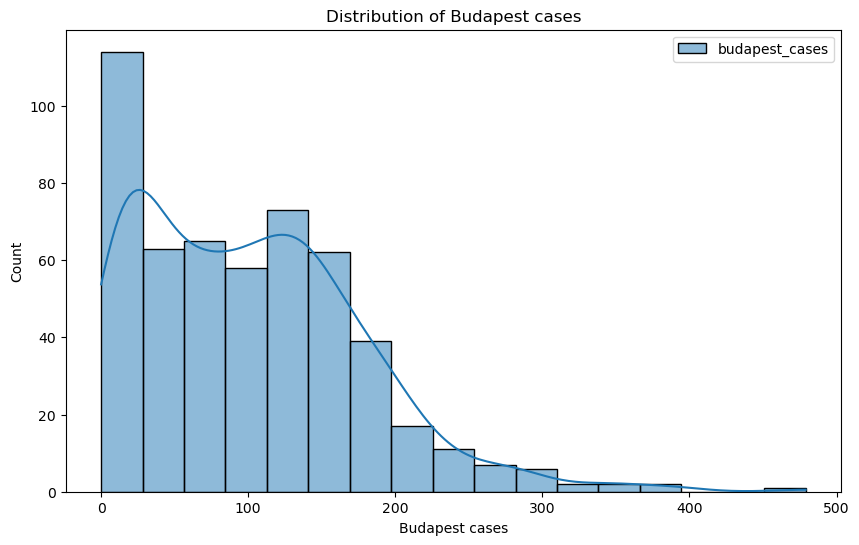

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(data=pox,kde=True)
plt.title('Distribution of Budapest cases')
plt.xlabel('Budapest cases')
plt.show()

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method on the DataFrame to answer this question.

In [55]:
# The total cases of each year
pox.resample('YE').sum()

,budapest_cases
date,
2005-12-31,4562
2006-12-31,6498
2007-12-31,6311
2008-12-31,4441
2009-12-31,5527
2010-12-31,5222
2011-12-31,5404
2012-12-31,5353
2013-12-31,5157


In [59]:
# The average cases of each year
pox.resample('YE').mean()

,budapest_cases
date,
2005-12-31,87.730769
2006-12-31,124.961538
2007-12-31,119.075472
2008-12-31,85.403846
2009-12-31,106.288462
2010-12-31,100.423077
2011-12-31,103.923077
2012-12-31,101.000000
2013-12-31,99.173077


### Visualizations

**Make a line plot of chickenpox cases**

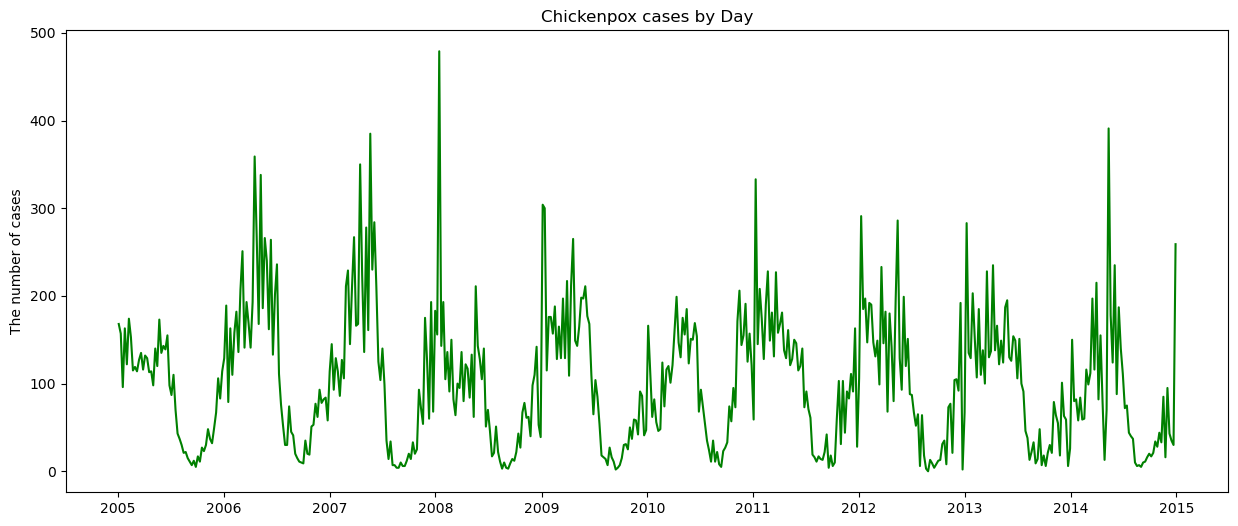

In [75]:
plt.figure(figsize=(15,6))
plt.plot(pox, color='green')
plt.title('Chickenpox cases by Day')
plt.ylabel('The number of cases')
plt.show()

**In short answer format, describe any apparent trends**

In [ ]:
# It can be seen that there'are seasonal trends.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

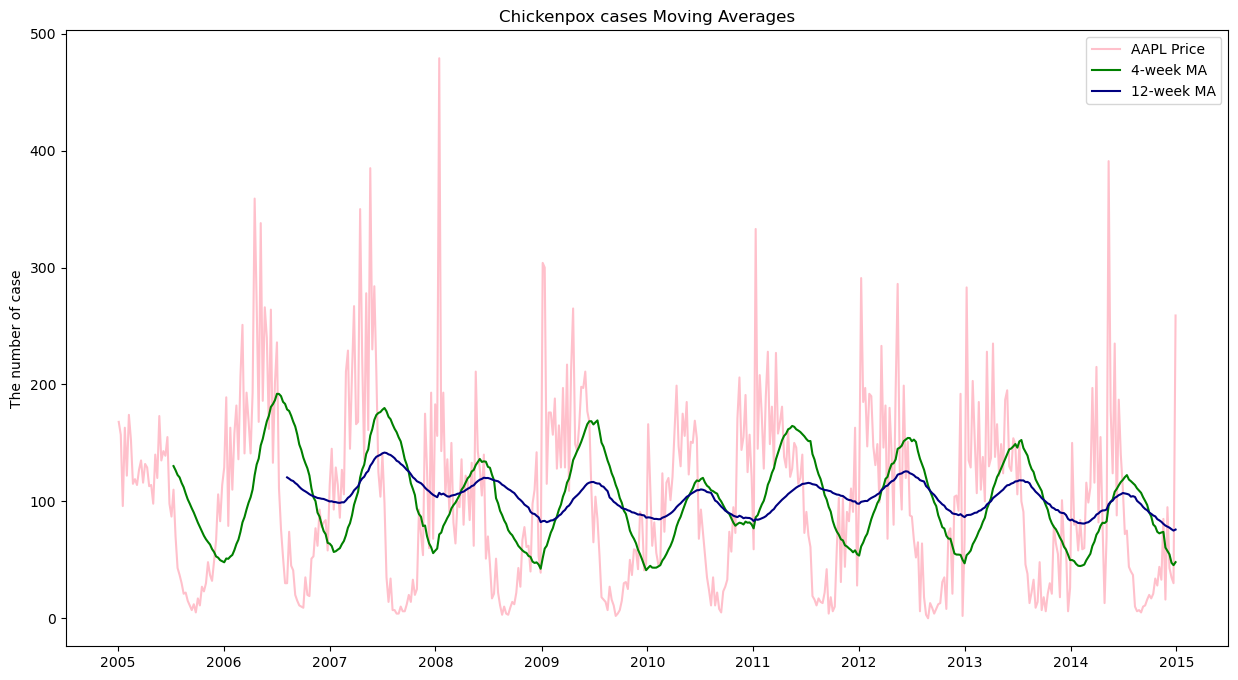

In [89]:
plt.figure(figsize=(15,8))
plt.plot(pox, color='pink', label='AAPL Price')
plt.plot(pox.rolling(28).mean(), color='green', label='4-week MA')
plt.plot(pox.rolling(84).mean(), color='navy', label='12-week MA')
plt.title('Chickenpox cases Moving Averages')
plt.ylabel('The number of case')
plt.legend()
plt.show()

### Plot yearly chickenpox cases

You may need to use [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) again for this.

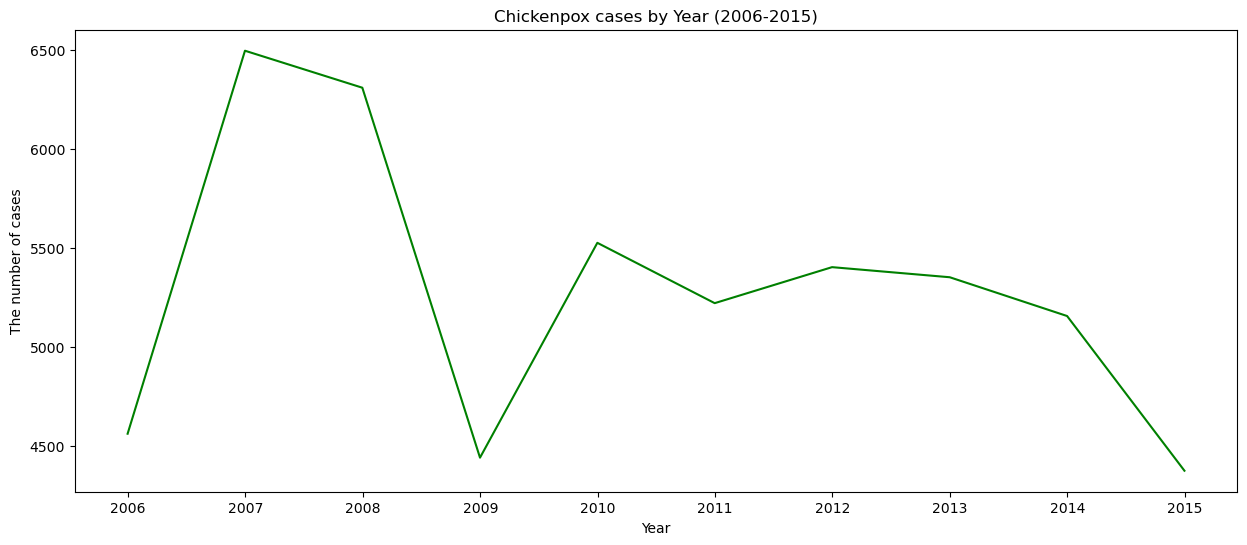

In [77]:
plt.figure(figsize=(15,6))
plt.plot(pox.resample('YE').sum(), color='green')
plt.title('Chickenpox cases by Year (2006-2015)')
plt.xlabel('Year')
plt.ylabel('The number of cases')
plt.show()